# Exam Data

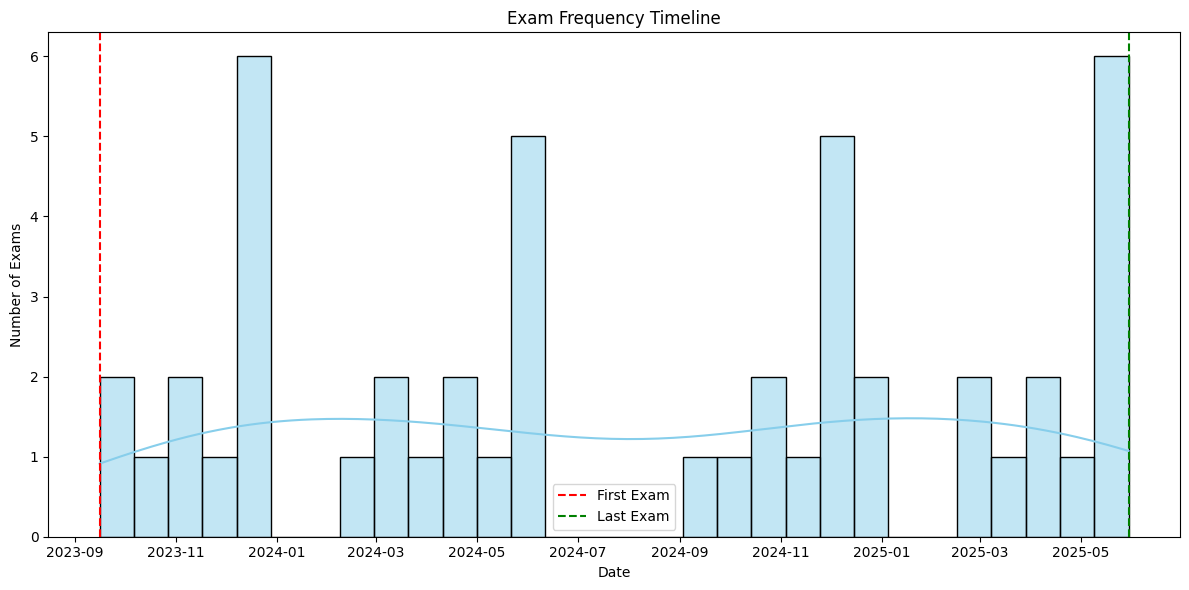

<ipython-input-6-444fac3c5d94>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=exam_schedule_df, x='Day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='coolwarm')


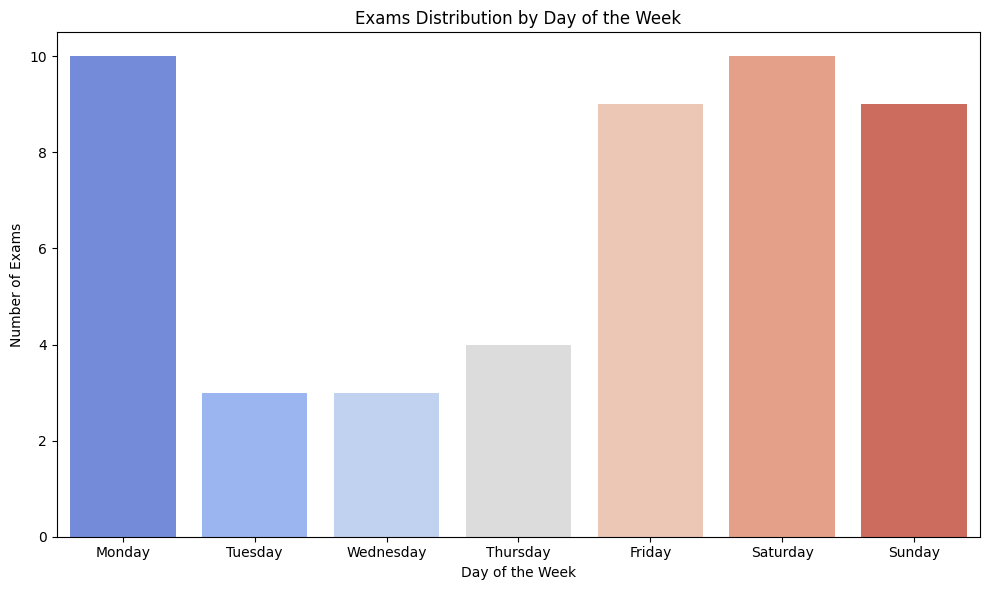

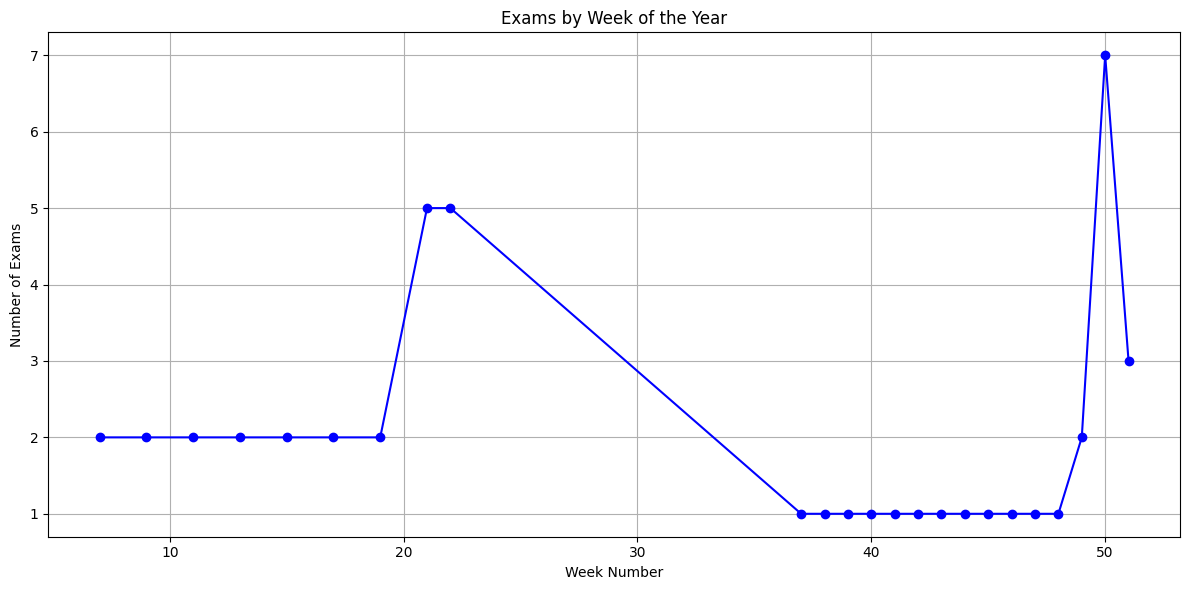

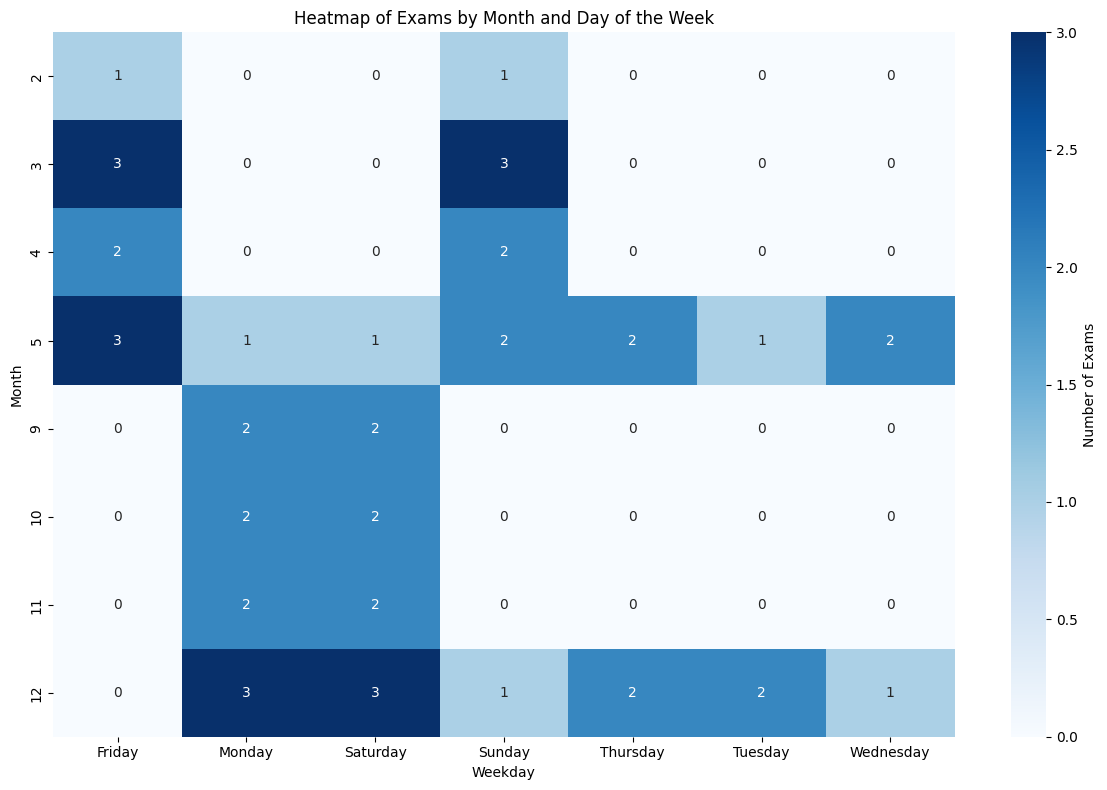

<ipython-input-6-444fac3c5d94>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=exam_schedule_df, x='Semester', y=exam_schedule_df['Date'].dt.dayofyear, palette='Set3')


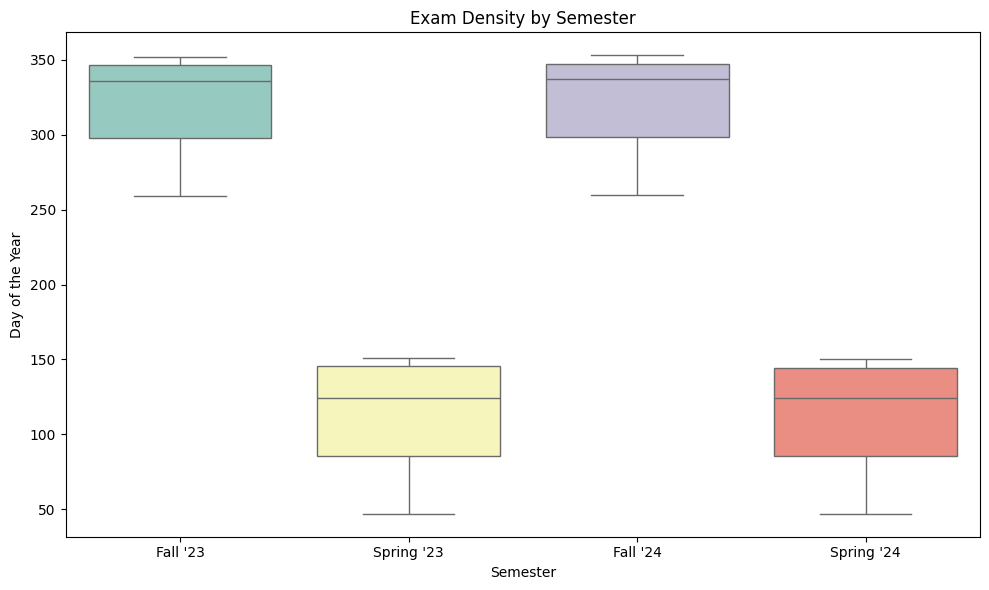

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
file_name = 'Exam_Schedule_4_Semesters.csv'
exam_schedule_df = pd.read_csv(file_name)

# Convert the 'Date' column to datetime
exam_schedule_df['Date'] = pd.to_datetime(exam_schedule_df['Date'])
exam_schedule_df['Week'] = exam_schedule_df['Date'].dt.isocalendar().week
exam_schedule_df['Day'] = exam_schedule_df['Date'].dt.day_name()

# Highlight Exam Periods
plt.figure(figsize=(12, 6))
sns.histplot(exam_schedule_df['Date'], bins=30, kde=True, color='skyblue')
plt.title('Exam Frequency Timeline')
plt.xlabel('Date')
plt.ylabel('Number of Exams')
plt.axvline(x=exam_schedule_df['Date'].min(), color='red', linestyle='--', label='First Exam')
plt.axvline(x=exam_schedule_df['Date'].max(), color='green', linestyle='--', label='Last Exam')
plt.legend()
plt.tight_layout()
plt.show()

# Weekly Distribution of Exams
plt.figure(figsize=(10, 6))
sns.countplot(data=exam_schedule_df, x='Day', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='coolwarm')
plt.title('Exams Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Exams')
plt.tight_layout()
plt.show()

# Exam Clusters by Week
weekly_exam_counts = exam_schedule_df.groupby('Week').size()

plt.figure(figsize=(12, 6))
plt.plot(weekly_exam_counts.index, weekly_exam_counts.values, marker='o', linestyle='-', color='blue')
plt.title('Exams by Week of the Year')
plt.xlabel('Week Number')
plt.ylabel('Number of Exams')
plt.grid()
plt.tight_layout()
plt.show()

# Heatmap of Exams by Month and Weekday
exam_schedule_df['Month'] = exam_schedule_df['Date'].dt.month
heatmap_data = pd.crosstab(exam_schedule_df['Month'], exam_schedule_df['Day'], rownames=['Month'], colnames=['Weekday'])

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Number of Exams'})
plt.title('Heatmap of Exams by Month and Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

# Exam Density by Semester
plt.figure(figsize=(10, 6))
sns.boxplot(data=exam_schedule_df, x='Semester', y=exam_schedule_df['Date'].dt.dayofyear, palette='Set3')
plt.title('Exam Density by Semester')
plt.xlabel('Semester')
plt.ylabel('Day of the Year')
plt.tight_layout()
plt.show()




# Spotify Data

In [7]:
# Find the time interval for exams
time_interval_start = exam_schedule_df['Date'].min()
time_interval_end = exam_schedule_df['Date'].max()
time_interval = time_interval_end - time_interval_start

# Print the time interval details
print("Time Interval:")
print(f"Start: {time_interval_start}")
print(f"End: {time_interval_end}")
print(f"Duration: {time_interval}")

# List of JSON file paths for Spotify data
file_paths = [
    'Streaming_History_Audio_2022-2023_5.json',
    'Streaming_History_Audio_2023-2024_6.json',
    'Streaming_History_Audio_2024_7.json'
]

# Initialize a list to store Spotify data DataFrames
dataframes = []

# Load each JSON file into a DataFrame
for file_path in file_paths:
    try:
        # Read JSON file into a DataFrame
        df = pd.read_json(file_path)
        # Append the DataFrame to the list
        dataframes.append(df)
    except ValueError as e:
        print(f"Error loading {file_path}: {e}")

# Concatenate all Spotify DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the columns of the combined DataFrame
print("Combined Spotify Data Columns:")
print(combined_df.columns)

Time Interval:
Start: 2023-09-16 00:00:00
End: 2025-05-30 00:00:00
Duration: 622 days 00:00:00
Combined Spotify Data Columns:
Index(['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped', 'offline', 'offline_timestamp',
       'incognito_mode'],
      dtype='object')


In [21]:
# Convert 'ts' column to datetime and extract the date
combined_df['date'] = pd.to_datetime(combined_df['ts']).dt.date

# Select relevant columns
relevant_columns = [
    'date',
    'master_metadata_track_name',
    'master_metadata_album_artist_name',
    'master_metadata_album_album_name',
    'spotify_track_uri',
    'ms_played'
]

# Filter the DataFrame to keep only relevant columns
filtered_df = combined_df[relevant_columns]

# Rename columns for better readability
filtered_df.rename(columns={
    'ts': 'timestamp',
    'master_metadata_track_name': 'track_name',
    'master_metadata_album_artist_name': 'artist_name',
    'master_metadata_album_album_name': 'album_name',
    'spotify_track_uri': 'track_uri',
    'ms_played': 'played_time_in_ms'
}, inplace=True)

# Display the updated DataFrame
print(filtered_df.head())


         date               track_name      artist_name  \
0  2022-11-10           Senin Yüzünden            Buray   
1  2022-11-10                 Bir Daha    Zeynep Bastık   
2  2022-11-10  Kafam Senden Bile Güzel            Kolpa   
3  2022-11-10   Kırk Yılda Bir Gibisin  Emrah Karaduman   
4  2022-11-10          Sevişmemiz Olay             EDIS   

              album_name                             track_uri  \
0         Senin Yüzünden  spotify:track:2xIC5DmTHaGBL83a9OUXM4   
1             Zeynodisco  spotify:track:01jvXT0DK6mIEpnIvaeqdO   
2  Aşk Ve Hayat Hakkında  spotify:track:0d4rto68XJzcTTzFQQ54eS   
3              Toz Duman  spotify:track:1bDRZpVuQOUx5huTjHP8z9   
4                     An  spotify:track:7kgPBthoIFHFGHHUAHjnGs   

   played_time_in_ms  
0                348  
1               2391  
2               1207  
3                626  
4               4133  


<ipython-input-21-c3c2519bed29>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={


In [22]:
# Filter the data to include only rows within the specified time interval
filtered_df = filtered_df[
    (filtered_df['date'] >= time_interval_start.date()) &
    (filtered_df['date'] <= time_interval_end.date())
]

# Display the filtered DataFrame and confirm the time range
print(f"Data filtered to time interval: {time_interval_start.date()} to {time_interval_end.date()}")
print(filtered_df)



Data filtered to time interval: 2023-09-16 to 2025-05-30
             date       track_name   artist_name       album_name  \
19574  2023-09-16       BÖLÜM SONU         Güneş       BÖLÜM SONU   
19575  2023-09-16  Promilim Yüksek         cakal  Promilim Yüksek   
19576  2023-09-16          Pofuduk         Ezhel          Pofuduk   
19577  2023-09-16          CUFF IT       Beyoncé      RENAISSANCE   
19578  2023-09-16            Uçkun   Mabel Matiz            Uçkun   
...           ...              ...           ...              ...   
42277  2024-12-23            Keşke         Yalın    Bir Bakmışsın   
42278  2024-12-23  YANKI X İNTİHAR         Simge  YANKI X İNTİHAR   
42279  2024-12-23      ZEHİRLİ GÜL         BLOK3          OBSESIF   
42280  2024-12-23      ELLERİM BOŞ        M Lisa      ELLERİM BOŞ   
42281  2024-12-23   İkimizden Biri  Fatma Turgut   İkimizden Biri   

                                  track_uri  played_time_in_ms  
19574  spotify:track:1W7vixv87ysuAoOKzz0uLE      

In [23]:
print(filtered_df.tail())

             date       track_name   artist_name       album_name  \
42277  2024-12-23            Keşke         Yalın    Bir Bakmışsın   
42278  2024-12-23  YANKI X İNTİHAR         Simge  YANKI X İNTİHAR   
42279  2024-12-23      ZEHİRLİ GÜL         BLOK3          OBSESIF   
42280  2024-12-23      ELLERİM BOŞ        M Lisa      ELLERİM BOŞ   
42281  2024-12-23   İkimizden Biri  Fatma Turgut   İkimizden Biri   

                                  track_uri  played_time_in_ms  
42277  spotify:track:4g8phMgjFb2RecauuBJXmZ              41473  
42278  spotify:track:0E1hVdXGZu0MoE77bYyjie             151512  
42279  spotify:track:0SwRpscOdj6PBhudNVIGpW             176833  
42280  spotify:track:0Y4mwQ4z0Voplgh7o2OZYm             124000  
42281  spotify:track:7M9KPD0b04Z1rxJNGERuAe              42601  


In [26]:
# Calculate total playtime in minutes for each day
filtered_df['total_play_time_minutes'] = filtered_df['played_time_in_ms'] / 60000  # Convert milliseconds to minutes

# Group by date and sum the playtime
daily_total_playtime = filtered_df.groupby('date')['total_play_time_minutes'].sum().reset_index()

# Rename the column for clarity
daily_total_playtime.rename(columns={'total_play_time_minutes': 'total_play_time_minutes'}, inplace=True)


print(daily_total_playtime)


           date  total_play_time_minutes
0    2023-09-16                22.015533
1    2023-09-18                79.726283
2    2023-09-19                65.300767
3    2023-09-20                43.200433
4    2023-09-21                50.525800
..          ...                      ...
411  2024-12-17                 6.420933
412  2024-12-18               216.924867
413  2024-12-20                26.460767
414  2024-12-21                40.626483
415  2024-12-23                95.049733

[416 rows x 2 columns]


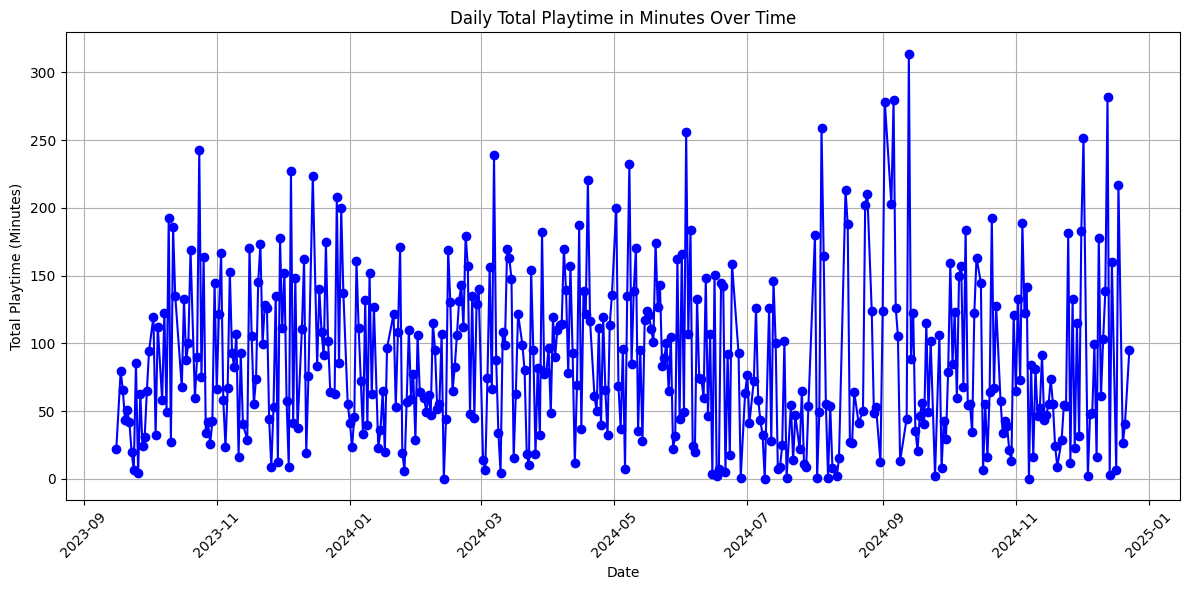

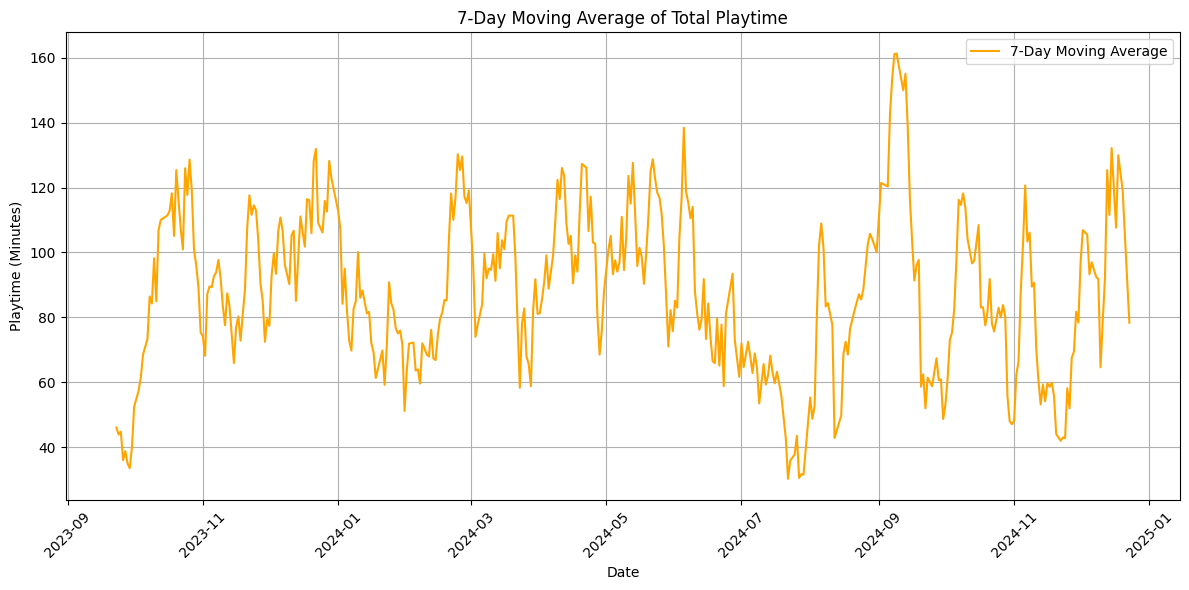

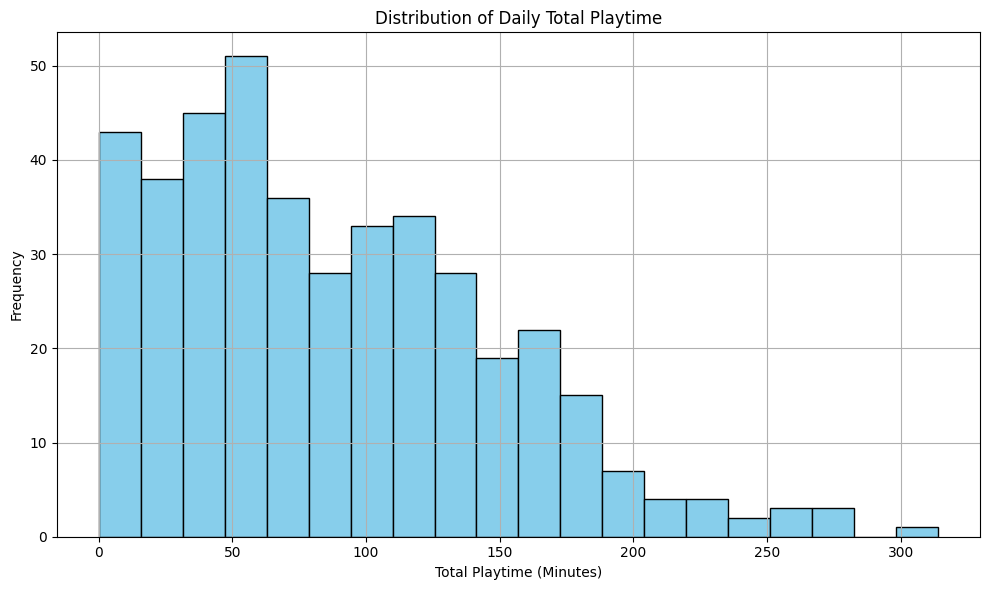

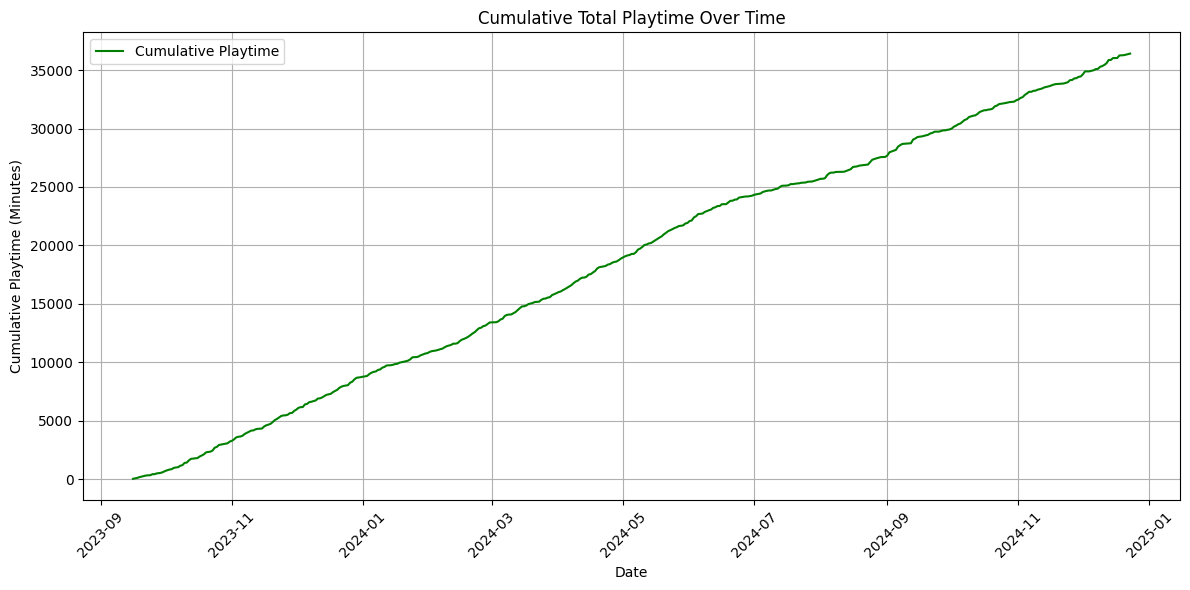

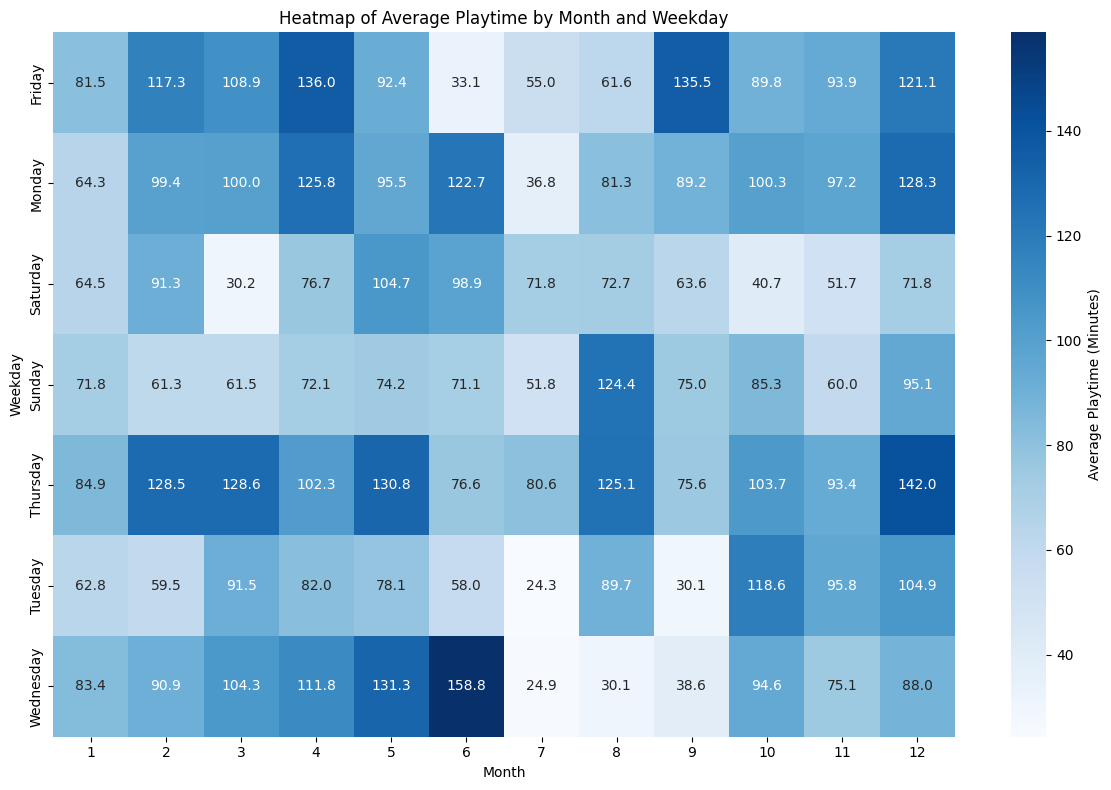

In [27]:
# Ensure 'date' is in datetime format
daily_total_playtime['date'] = pd.to_datetime(daily_total_playtime['date'])

# 1. Daily Total Playtime Over Time
plt.figure(figsize=(12, 6))
plt.plot(daily_total_playtime['date'], daily_total_playtime['total_play_time_minutes'], marker='o', linestyle='-', color='blue')
plt.title('Daily Total Playtime in Minutes Over Time')
plt.xlabel('Date')
plt.ylabel('Total Playtime (Minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Weekly Moving Average of Playtime
daily_total_playtime['7_day_avg_playtime'] = daily_total_playtime['total_play_time_minutes'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_total_playtime['date'], daily_total_playtime['7_day_avg_playtime'], color='orange', label='7-Day Moving Average')
plt.title('7-Day Moving Average of Total Playtime')
plt.xlabel('Date')
plt.ylabel('Playtime (Minutes)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Histogram of Playtime Distribution
plt.figure(figsize=(10, 6))
plt.hist(daily_total_playtime['total_play_time_minutes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Total Playtime')
plt.xlabel('Total Playtime (Minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Cumulative Total Playtime Over Time
daily_total_playtime['cumulative_playtime'] = daily_total_playtime['total_play_time_minutes'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(daily_total_playtime['date'], daily_total_playtime['cumulative_playtime'], color='green', label='Cumulative Playtime')
plt.title('Cumulative Total Playtime Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Playtime (Minutes)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Heatmap of Playtime by Month and Day of the Week
daily_total_playtime['month'] = daily_total_playtime['date'].dt.month
daily_total_playtime['weekday'] = daily_total_playtime['date'].dt.day_name()

heatmap_data = daily_total_playtime.pivot_table(values='total_play_time_minutes', index='weekday', columns='month', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='Blues', cbar_kws={'label': 'Average Playtime (Minutes)'})
plt.title('Heatmap of Average Playtime by Month and Weekday')
plt.xlabel('Month')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()


# Future Work - Looking for Connection btw them